<h1 align="center">Distribuciones y Normalidad.</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

En este Jupyter Notebook se modela la presión arterial, con valores comprendidos entre 115 mmHg y 125 mmHg, a partir de tres variables aleatorias X1, X2 y X3, cada una con una distribuciones estadística diferente a las otras. Determinar si las variables X1, X2 y X3, pueden ser descritas por una distribución normal.

+ [Worked Example 2019](https://drive.google.com/file/d/1oucWfDP2BVa5et_gOOYJsVSvo8rq5n6M/view).

+ ¿Por qué es importante probar la normalidad de los datos? [Wikipedia en Inglés](https://en.wikipedia.org/wiki/Normality_test)

## 1. Cargar librerías 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 2. Obtención de las variables aleatorias X1, X2, X3

In [2]:
N = 100
xMin = 115 # mmHg
xMax = 125 # mmHg

xMean = 120 # mmHg
xVar  =   5 # mmHg

In [3]:
x1 = np.random.uniform(low=xMin, high=xMax, size=N)
x2 = np.random.normal(loc=xMean, scale=xVar/2.0, size=N)
x3 = np.random.poisson(size=N)
x3 = (x3 - x3.mean()) + xMean

x1 = np.round(x1, decimals=2)
x2 = np.round(x2, decimals=2)
x3 = np.round(x3, decimals=2)

data = pd.DataFrame({'X1':x1, 'X2':x2, 'X3':x3})
k = 0
Nk = len(data.columns)

In [4]:
data

,X1,X2,X3
0,115.03,115.07,118.9
1,117.14,121.20,119.9
2,120.54,123.17,120.9
3,122.73,118.59,120.9
4,120.06,117.27,118.9
...,...,...,...
95,123.56,119.77,118.9
96,121.85,123.76,119.9
97,121.63,118.06,120.9
98,120.33,118.89,119.9


## 3. Gráfica de las variables aleatorias y sus diagramas de frecuencia

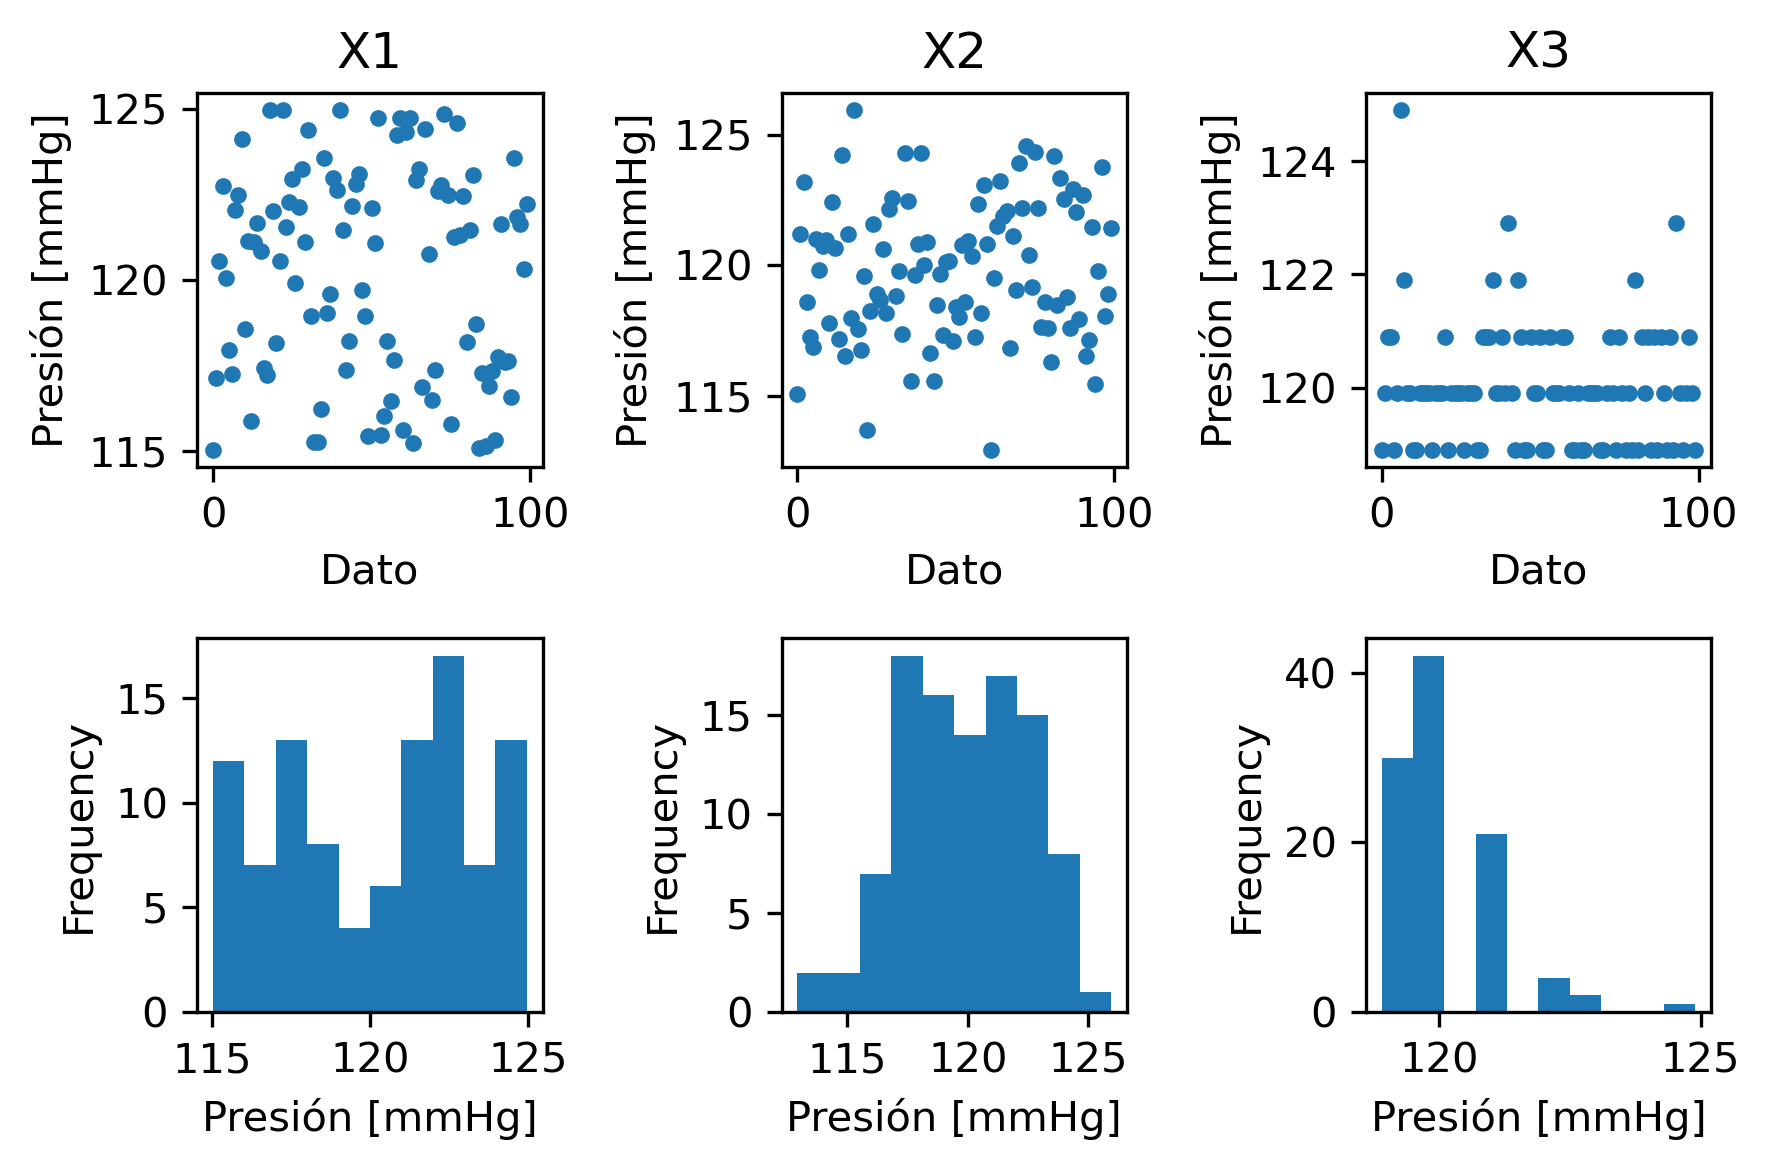

In [5]:
plt.figure(dpi=300)
for c in data.columns:
    k += 1
    plt.subplot(2,Nk,k)
    ax = data[c].plot(style='.')
    ax.set_xlabel('Dato')
    ax.set_ylabel(u'Presión [mmHg]')
    plt.title(c)

    plt.subplot(2,Nk,k+Nk)
    ax = data[c].plot.hist()
    ax.set_xlabel(u'Presión [mmHg]')
    plt.tight_layout()

## 4. Pruebas de normalidad
Al observar las gráficas y los valores obtenidos de la prueba Shapiro-Wilk, se puede concluir que la variable X2 se podría describir por una distribución normal mientras que las otras dos variables, no.

In [6]:
for c in data.columns:
    print('---')
    print(c)
    # Shapiro-Wilk -> W and pvalue #
    SW = stats.shapiro(data[c])
    print('\tShapiro -Wilk test')
    print('\t  W:', SW[0])
    print('\t  p:', SW[1])
    # Kolmogorov–Smirnov -> statistic & pvalue#
    KS = stats.kstest(data[c],'norm')
    print('\tKolmogorov–Smirnov test')
    print('\t  Statistic:', KS.statistic)
    print('\t  p:', KS.pvalue)
    # Anderson–Darling #
    AD = stats.anderson(data[c], dist='norm')
    print('\tAnderson–Darling test')
    print('\t  Statistic:', AD.statistic)
    print('\t  Critical values:', AD.critical_values)
    print('\t  Significance level:', AD.significance_level)

---
X1
	Shapiro -Wilk test
	  W: 0.9363672137260437
	  p: 0.00011654184345388785
	Kolmogorov–Smirnov test
	  Statistic: 1.0
	  p: 0.0
	Anderson–Darling test
	  Statistic: 1.9415429806172
	  Critical values: [0.555 0.632 0.759 0.885 1.053]
	  Significance level: [15.  10.   5.   2.5  1. ]
---
X2
	Shapiro -Wilk test
	  W: 0.988567054271698
	  p: 0.5509093403816223
	Kolmogorov–Smirnov test
	  Statistic: 1.0
	  p: 0.0
	Anderson–Darling test
	  Statistic: 0.3955056356351463
	  Critical values: [0.555 0.632 0.759 0.885 1.053]
	  Significance level: [15.  10.   5.   2.5  1. ]
---
X3
	Shapiro -Wilk test
	  W: 0.8134663105010986
	  p: 6.557321352573808e-10
	Kolmogorov–Smirnov test
	  Statistic: 1.0
	  p: 0.0
	Anderson–Darling test
	  Statistic: 5.718976663038504
	  Critical values: [0.555 0.632 0.759 0.885 1.053]
	  Significance level: [15.  10.   5.   2.5  1. ]


## 5. Preguntas de autoexplicación

5.1. Para el caso de estudio, escriba la hipótesis nula necesaria para aplicar las pruebas estadísticas de normalidad. Se sugiere leer la documentación de las pruebas referidas en este Jupyter Notebook.

5.2. Cada una de las pruebas estadísticas de normalidad tienen unos parámetros estadísticos, entre ellos suele aparecer el p-value. Con sus propias palabras, describa el propósito del p-value y cómo se utiliza para aceptar o rechazar una hipótesis nula.

5.3. Describa, para las pruebas estadísticas de normalidad referidas en este Jupyter Notebook, el significado y cómo se utilizan los parámetros de salida de las mismas.

5.4. Describa cómo al aumentar el número de datos de la muestra cambia el resultado de la prueba de normalidad y las gráficas.

End!